# Analysis of Expert Consensus Rankings

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set working directory
import os
os.chdir('C:\\Users\\Jack\\Documents\\GitHub\\FFInsights\\data')

In [56]:
# Load data
df = pd.read_csv('total_ecr_stats.csv')
df = df[df['RK'] > 0]
df = df[df['FPTS'] > 0]
df.head()

,RK,TIERS,PLAYER,POS,BEST,WORST,AVG,STD_DEV,ECR_VS_ADP,POSRK,FPTS,FPTS/G,Year
0,1.0,1.0,Arian Foster,RB,1.0,4.0,1.6,0.8,0,1.0,302.1,18.9,2012.0
1,2.0,1.0,Ray Rice,RB,1.0,5.0,1.9,0.9,0,2.0,283.1,17.7,2012.0
2,3.0,1.0,LeSean McCoy,RB,2.0,4.0,3.0,0.6,0,3.0,199.3,16.6,2012.0
3,4.0,1.0,Calvin Johnson,WR,3.0,7.0,4.4,1.1,+1,1.0,342.4,21.4,2012.0
4,5.0,2.0,Aaron Rodgers,QB,4.0,12.0,6.1,1.9,-1,1.0,344.5,21.5,2012.0


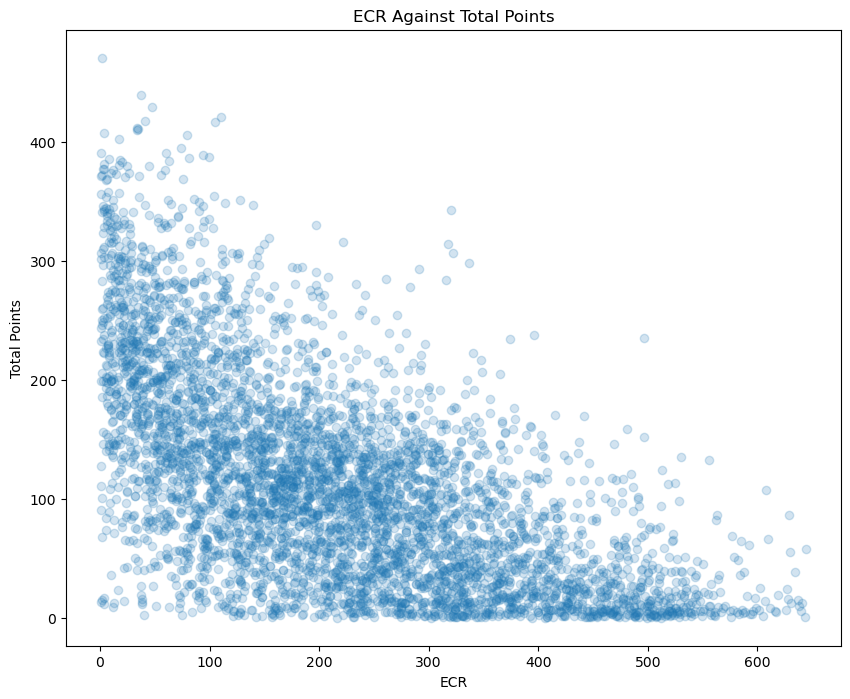

In [67]:
# Scatterplot 'RK' vs 'FPTS'
plt.figure(figsize=(10,8))
plt.scatter(df['RK'], df['FPTS'], alpha=0.20)
plt.title("ECR Against Total Points")
plt.ylabel("Total Points")
plt.xlabel("ECR")
plt.show()

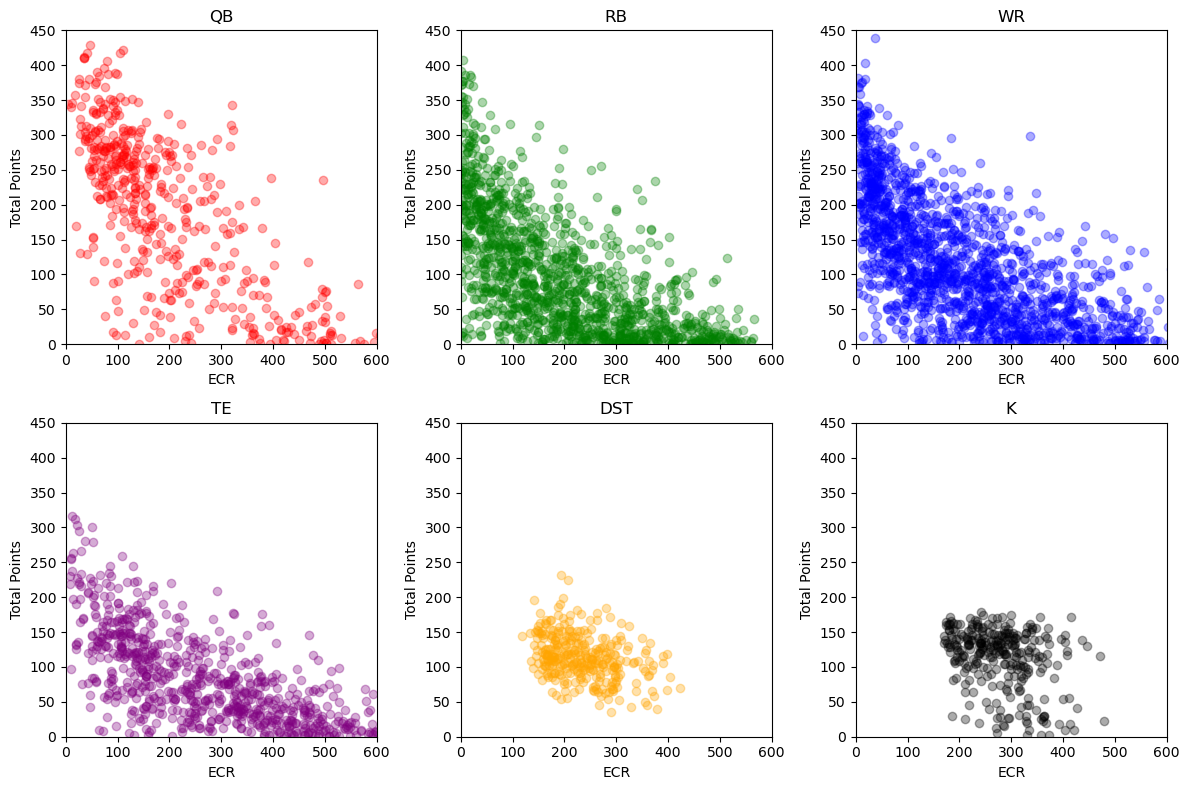

In [66]:
def plot_position(df, pos, subplot_num, color):
    data = df[df['POS'] == pos]
    plt.subplot(2, 3, subplot_num)
    plt.scatter(data['RK'], data['FPTS'], alpha=0.33, color=color)
    plt.title(pos)
    plt.ylabel("Total Points")
    plt.xlabel("ECR")
    plt.ylim(0, 450)
    plt.xlim(0, 600)

plt.figure(figsize=(12,8))


positions = ['QB', 'RB', 'WR', 'TE', 'DST', 'K']
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']
for i, (pos, color) in enumerate(zip(positions, colors), 1):
    plot_position(df, pos, i, color)

plt.tight_layout()
plt.show()

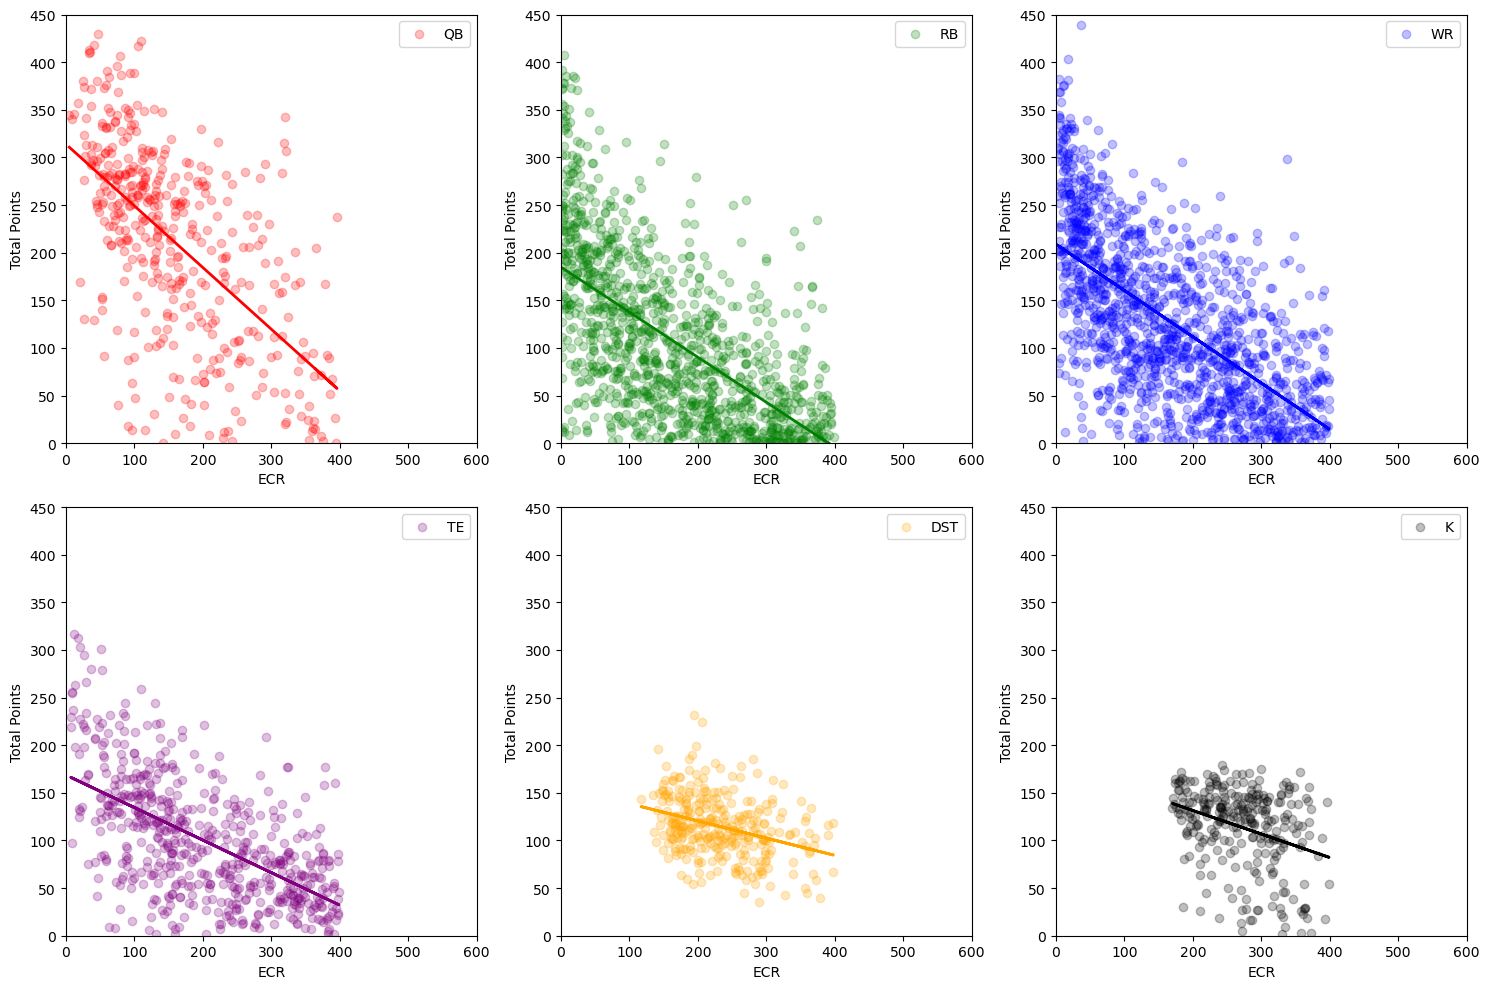

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def analyze_position(df, pos, ax, color):
    data = df[df['POS'] == pos]
    data = data[data['FPTS'] > 0]
    data = data[data['RK'] > 0]
    data = data[data['RK'] < 400]

    X = data['RK'].values.reshape(-1,1)
    y = data['FPTS'].values.reshape(-1,1)

    model = LinearRegression()
    model.fit(X, y)
    pred = model.predict(X)

    ax.scatter(X, y, color=color, label=pos, alpha=0.25)
    ax.plot(X, pred, color=color, linewidth=2)
    ax.set_ylabel("Total Points")
    ax.set_xlabel("ECR")

positions = ['QB', 'RB', 'WR', 'TE', 'DST', 'K']
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for pos, color, ax in zip(positions, colors, axs):
    analyze_position(df, pos, ax, color)
    ax.legend()
    ax.set_xlim(0, 600)
    ax.set_ylim(0, 450)

plt.tight_layout()
plt.show()

# Bootstrapping

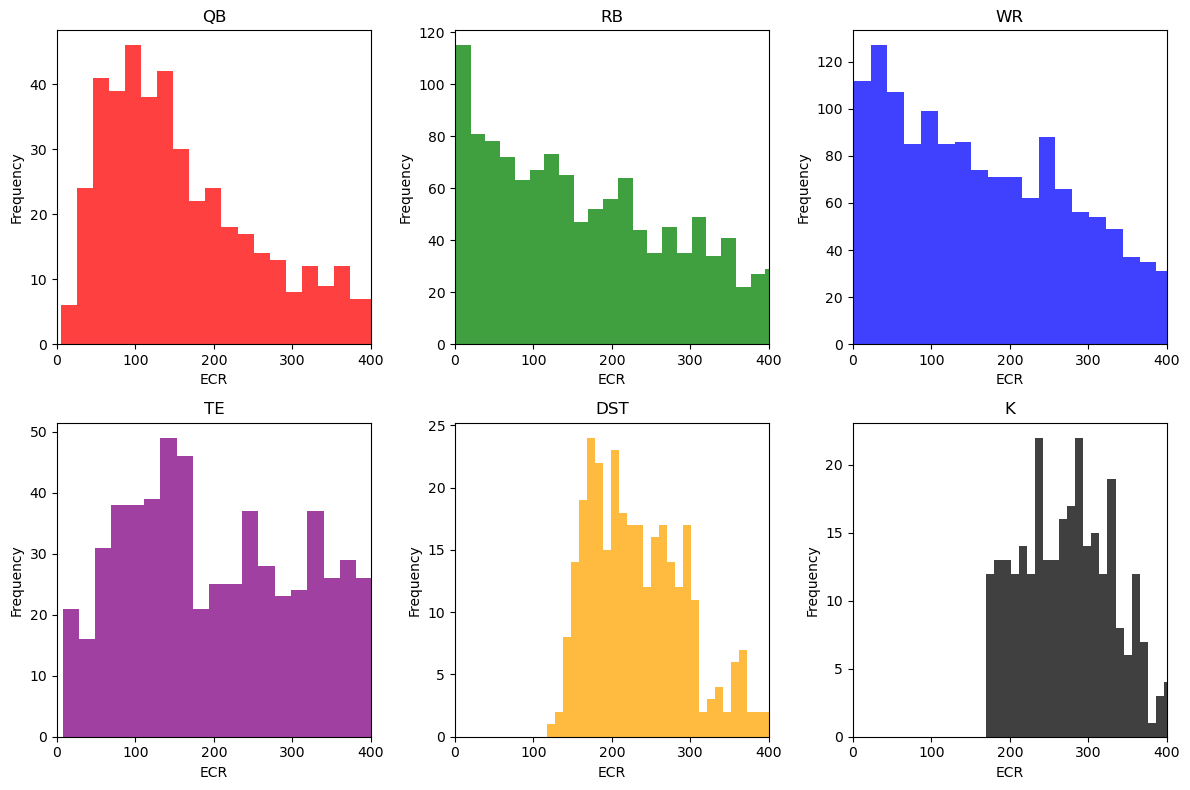

In [73]:
# Histograms of RK by position
def plot_histogram(pos, subplot_num, color):
    data = df[df['POS'] == pos]
    if data.empty:
        print(f"No data for position {pos}")
        return
    plt.subplot(2, 3, subplot_num)
    plt.hist(data['RK'], bins=30, color=color, alpha=0.75)
    plt.title(pos)
    plt.ylabel("Frequency")
    plt.xlabel("ECR")
    plt.xlim(0, 400)

plt.figure(figsize=(12,8))

positions = ['QB', 'RB', 'WR', 'TE', 'DST', 'K']
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']

for i, (pos, color) in enumerate(zip(positions, colors), 1):
    plot_histogram(pos, i, color)

plt.tight_layout()
plt.show()

In [170]:
# Bootsrapping

# Linear regression
from sklearn.linear_model import LinearRegression
def regression_eq(data):
    data = data[data['FPTS'] > 0]
    data = data[data['RK'] > 0]
    data = data[data['RK'] < 400]
    X = data['RK'].values.reshape(-1,1)
    y = data['FPTS'].values.reshape(-1,1)
    model = LinearRegression()
    model.fit(X, y)
    return model

qb_model = regression_eq(df[df['POS'] == 'QB'])
rb_model = regression_eq(df[df['POS'] == 'RB'])
wr_model = regression_eq(df[df['POS'] == 'WR'])
te_model = regression_eq(df[df['POS'] == 'TE'])
dst_model = regression_eq(df[df['POS'] == 'DST'])
k_model = regression_eq(df[df['POS'] == 'K'])

In [191]:
# Define a function to draw selections for a team
def calculate_draft_picks(num_teams, first_selection, num_rounds):
    selections = []
    for round in range(1, num_rounds + 1):
        if round % 2 != 0:  # Odd rounds
            pick = (round - 1) * num_teams + first_selection
        else:  # Even rounds
            pick = round * num_teams - (first_selection - 1)
        selections.append(pick)
    return selections

# Example usage:
num_teams = 12
first_selection = 2
num_rounds = 20
print(calculate_draft_picks(num_teams, first_selection, num_rounds))

[2, 23, 26, 47, 50, 71, 74, 95, 98, 119, 122, 143, 146, 167, 170, 191, 194, 215, 218, 239]


Change positionals into ["QB1", "RB1", "Rb2", ...] so that then later when I calculate team_fpts I can make a scaling effect for the second and thrid and foruth... string players. This means that a second string QB will only add a certain percentage of their points to the total team's points.

In [190]:
# Simulate a team
import random
import pandas as pd

def ranks(df):
    positionals = {"QB":1,"RB":3,"WR":3,"TE":1,"DST":1,"K":1}
    ranks = pd.DataFrame()
    POS = [k for k, v in positionals.items() for i in range(v)]
    num_teams = 12
    first_selection = random.randint(1, num_teams) # Randomize first selection
    num_rounds = sum(positionals.values()) # Total players from dictionary
    selections = calculate_draft_picks(num_teams, first_selection, num_rounds)
    for pos, num in positionals.items():
        for i in range(num):
            rk = random.sample(selections, 1)[0]
            selections.remove(rk)
            new_row = pd.DataFrame({'POS':pos, 'RK':rk}, index=[0])
            ranks = pd.concat([ranks, new_row], ignore_index=True)
    return ranks

ranks(df)

,POS,RK
0,QB,30
1,RB,6
2,RB,102
3,RB,91
4,WR,115
5,WR,43
6,WR,67
7,TE,54
8,DST,78
9,K,19


In [180]:
# Calculate team total points
def team_fpts(team):
    fpts = 0
    for i in range(len(team)):
        pos = team.iloc[i]['POS']
        rk = team.iloc[i]['RK']
        if pos == 'QB':
            fpts += (qb_model.predict((rk).reshape(-1,1)))
        elif pos == 'RB':
            fpts += (rb_model.predict((rk).reshape(-1,1)))
        elif pos == 'WR':
            fpts += (wr_model.predict((rk).reshape(-1,1)))
        elif pos == 'TE':
            fpts += (te_model.predict((rk).reshape(-1,1)))
        elif pos == 'DST':
            fpts += (dst_model.predict((rk).reshape(-1,1)))
        elif pos == 'K':
            fpts += (k_model.predict((rk).reshape(-1,1)))
    return round(float(fpts),2)

# Generate a team
team_fpts(ranks(df))

1731.29

In [188]:
# Simulate 1000 teams and store total points and average ranks for each position
teams = []
for i in range(10000):
    r = ranks(df)
    rb_ranks = sorted(r[r['POS']=='RB']['RK'])
    wr_ranks = sorted(r[r['POS']=='WR']['RK'])
    teams.append([team_fpts(r), r[r['POS']=='QB']['RK'].values[0], 
                  *rb_ranks,
                  *wr_ranks, 
                  r[r['POS']=='TE']['RK'].values[0], 
                  r[r['POS']=='DST']['RK'].values[0], 
                  r[r['POS']=='K']['RK'].values[0]])
teams = pd.DataFrame(teams, columns=['FPTS', 'QB', 
                                    'RB1', 'RB2', 'RB3', 
                                    'WR1', 'WR2', 'WR3', 
                                    'TE', 'DST', 'K'])

In [189]:
teams.head()

,FPTS,QB,RB1,RB2,RB3,WR1,WR2,WR3,TE,DST,K
0,1733.35,62,14,38,83,59,86,110,35,11,107
1,1742.18,50,2,74,98,26,71,119,23,47,95
2,1744.40,95,47,71,74,2,26,50,98,23,119
3,1746.76,103,18,55,66,7,31,79,114,90,42
4,1744.31,39,10,63,106,34,82,111,15,58,87


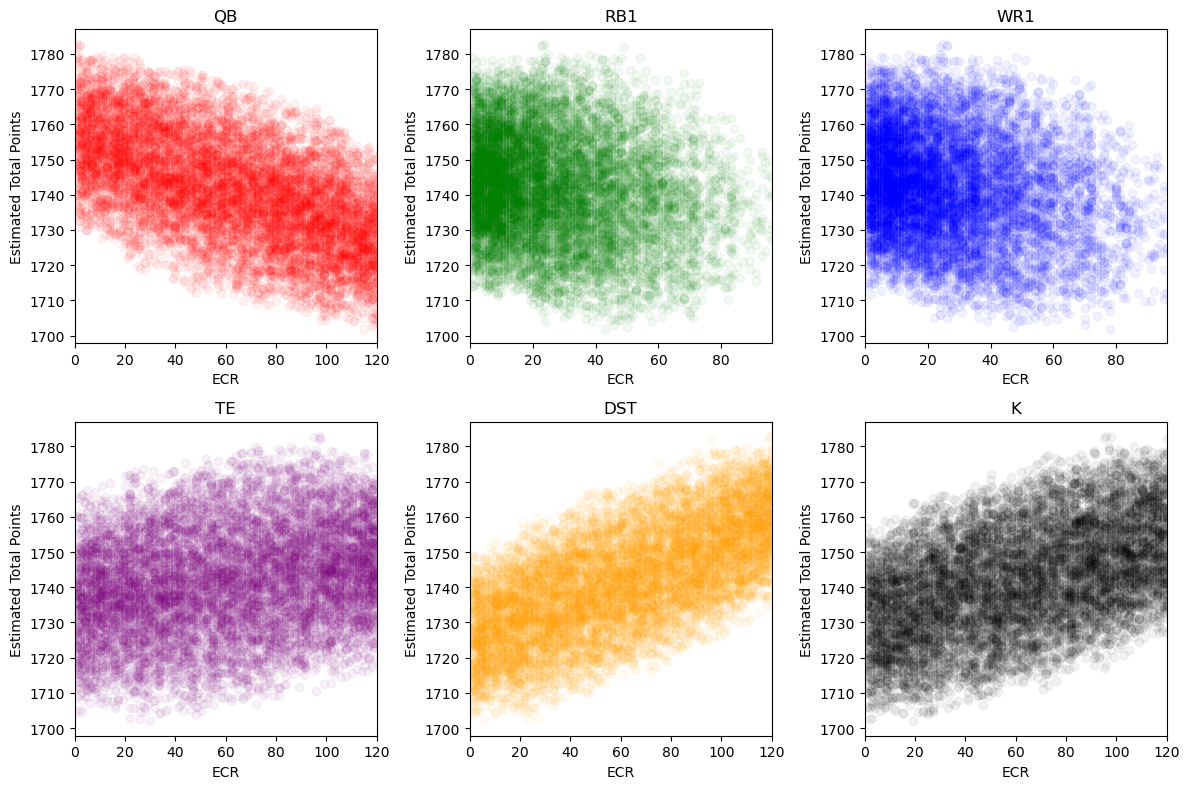

In [193]:
# Scatterplots of average ranks vs total points
def plot_scatter(teams, positions, colors):
    plt.figure(figsize=(12,8))
    for i, (pos, color) in enumerate(zip(positions, colors), 1):
        plt.subplot(2, 3, i)
        plt.scatter(teams[pos], teams['FPTS'], alpha=0.05, color=color)
        plt.xlim(0, max(teams[pos]))
        plt.title(pos)
        plt.ylabel("Estimated Total Points")
        plt.xlabel("ECR")
        plt.tight_layout()

positions = ['QB', 'RB1', 'WR1', 'TE', 'DST', 'K']
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']
plot_scatter(teams, positions, colors)

In [ ]:
# 